In [3]:
import pandas as pd
import scipy.stats
import numpy as np

In [4]:
afrs = pd.read_csv("Afr.CaQTLS.new.tsv", sep="\t", header=0)

In [5]:
caqtls = pd.read_csv("Eu.new.CaQTLS.tsv", sep="\t", header=0)
caqtls = caqtls[caqtls["IsUsed"] & caqtls["Inside_Peak"]==1]


In [6]:
afrs = afrs[afrs["IsUsed"]]


In [7]:
afrs

,chr_hg38,pos_hg38,allele1,allele2,snp_id,label,IsUsed,pval,beta,enformer.encsr000emt.variantscore.sad,...,chrombpnet.encsr095qnb.variantscore.logfc,chrombpnet.encsr095qnb.variantscore.jsd,chrombpnet.encsr095qnb.variantscore.csr,chrombpnet.encsr095qnb.variantscore.pval,dbsnp_rsid,region,snp,distance,se,abs_beta
2,chr1,870176,T,A,1_870176_T_A,False,True,0.071532,-0.250142,-0.000139,...,0.036457,0.019025,0.001262,0.048612,rs72631880,1:869800:870282,1_870176_T_A,375,0.137133,0.250142
4,chr1,905373,C,T,1_905373_T_C,False,True,0.188152,-0.130176,-0.000071,...,0.127411,0.025277,0.003640,0.018781,rs4970382,1:904938:905544,1_905373_T_C,434,0.098145,0.130176
8,chr1,906870,A,G,1_906870_A_G,False,True,0.151325,-0.335979,-0.000669,...,-0.850441,-0.048693,0.024808,0.002238,rs148658266,1:906596:907043,1_906870_A_G,273,0.232118,0.335979
9,chr1,906982,C,T,1_906982_C_T,True,True,0.000005,-0.520262,-0.000453,...,-0.406960,-0.029040,0.009527,0.007020,rs28540380,1:906596:907043,1_906982_C_T,385,0.106740,0.520262
12,chr1,921203,G,A,1_921203_G_A,True,True,0.000007,0.905971,0.000342,...,0.730897,0.085904,0.025396,0.002171,rs141671872,1:921132:921332,1_921203_G_A,70,0.189412,0.905971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219372,chr22,50583387,C,G,22_50583387_C_G,False,True,0.717574,-0.039875,0.000002,...,0.020411,0.012694,0.000294,0.137602,rs112714656,22:50583202:50583631,22_50583387_C_G,184,0.109887,0.039875
219373,chr22,50620690,T,G,22_50620690_G_T,False,True,0.178047,0.101003,-0.001514,...,0.028894,0.022597,0.001665,0.038481,rs3091400,22:50620470:50621609,22_50620690_G_T,219,0.074396,0.101003
219374,chr22,50621055,G,A,22_50621055_G_A,False,True,0.411079,0.094050,-0.000848,...,-0.038317,-0.024680,0.002349,0.028349,rs76733141,22:50620470:50621609,22_50621055_G_A,584,0.113873,0.094050
219375,chr22,50621446,T,C,22_50621446_T_C,False,True,0.217021,-0.123608,0.000378,...,-0.011861,-0.008688,0.000134,0.213307,rs75395540,22:50620470:50621609,22_50621446_T_C,975,0.099411,0.123608


In [8]:
sum(afrs["label"]==1)

8363

In [9]:
sum(afrs["label"]==0)

101283

In [10]:
min(afrs[afrs["label"]==0]["pval"])

0.00100034

In [11]:
max(afrs[afrs["label"]==0]["pval"])

0.999995

In [12]:
max(afrs[afrs["label"]==1]["pval"])

9.97713e-06

In [13]:
min(afrs[afrs["label"]==1]["pval"])

2.92178e-41

In [14]:
sum(afrs["label"]==1)+sum(afrs["label"]==0)

109646

In [15]:
afrs.shape

(109646, 46)

In [16]:
sum(afrs["label"]==1)/sum(afrs["label"]==0)

0.08257061895875913

In [17]:
max(afrs[afrs["label"]==1]["pval"])

9.97713e-06

In [18]:
min(afrs[afrs["label"]==1]["pval"])

2.92178e-41

In [19]:
afrs.columns

Index(['chr_hg38', 'pos_hg38', 'allele1', 'allele2', 'snp_id', 'label',
       'IsUsed', 'pval', 'beta', 'enformer.encsr000emt.variantscore.sad',
       'enformer.encsr000emt.variantscore.sar', 'enformer_recomputed',
       'chrombpnet.gambian.variantscore.logfc',
       'chrombpnet.gambian.variantscore.jsd',
       'chrombpnet.esan.variantscore.logfc',
       'chrombpnet.esan.variantscore.jsd',
       'chrombpnet.mende.variantscore.logfc',
       'chrombpnet.mende.variantscore.jsd',
       'chrombpnet.yoruba.variantscore.logfc',
       'chrombpnet.yoruba.variantscore.jsd',
       'chrombpnet.maasai.variantscore.logfc',
       'chrombpnet.maasai.variantscore.jsd',
       'chrombpnet.luhya.variantscore.logfc',
       'chrombpnet.luhya.variantscore.jsd',
       'chrombpnet.encsr637xsc.variantscore.logfc',
       'chrombpnet.encsr637xsc.variantscore.jsd',
       'chrombpnet.encsr637xsc.variantscore.csr',
       'chrombpnet.encsr637xsc.variantscore.pval',
       'chrombpnet.encsr000emt.var

# AUPRC (benchmarking)

Text(0, 0.5, 'Precision')

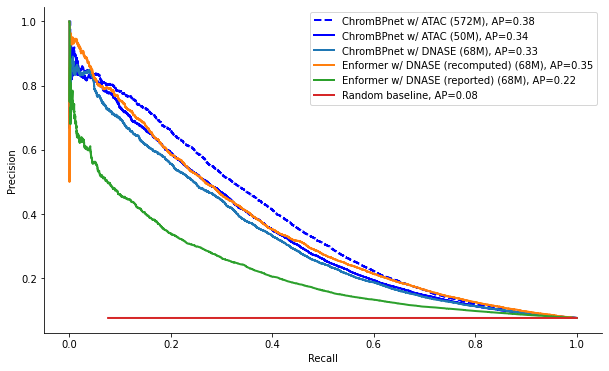

In [20]:

import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import matplotlib


matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42 

import random
import os
import argparse
from sklearn.metrics import precision_recall_curve


fig, ax = plt.subplots(figsize=(10,6))

######################################

keyd="chrombpnet.encsr637xsc.variantscore.csr"

label=afrs["label"].astype(int)
score=abs(afrs[keyd])

title="ChromBPnet w/ ATAC (572M)"

fpr_chrombpnet, tpr_chrombpnet, _ = precision_recall_curve(label,score)
roc_auc = metrics.average_precision_score(label, score)
ax.plot(tpr_chrombpnet,fpr_chrombpnet,  linewidth=2, c='blue', linestyle='dashed', label=title+", AP="+str(round(roc_auc,2)))

######################################

keyd="chrombpnet.encsr637xsc_50m.variantscore.csr"
label=afrs["label"].astype(int)
score=abs(afrs[keyd])

title="ChromBPnet w/ ATAC (50M)"

fpr_chrombpnet, tpr_chrombpnet, _ = precision_recall_curve(label,score)
roc_auc = metrics.average_precision_score(label, score)
ax.plot(tpr_chrombpnet,fpr_chrombpnet,  linewidth=2, c='blue', label=title+", AP="+str(round(roc_auc,2)))

######################################

keyd="chrombpnet.encsr000emt.variantscore.csr"
label=afrs["label"].astype(int)
score=abs(afrs[keyd])

title="ChromBPnet w/ DNASE (68M)"

fpr_chrombpnet, tpr_chrombpnet, _ = precision_recall_curve(label,score)
roc_auc = metrics.average_precision_score(label, score)
ax.plot(tpr_chrombpnet,fpr_chrombpnet,  linewidth=2, label=title+", AP="+str(round(roc_auc,2)))

######################################



keyd="enformer_recomputed"
label=afrs["label"].astype(int)
score=abs(afrs[keyd])
title="Enformer w/ DNASE (recomputed) (68M)"

fpr_chrombpnet, tpr_chrombpnet, _ = precision_recall_curve(label,score)
roc_auc = metrics.average_precision_score(label, score)
ax.plot(tpr_chrombpnet,fpr_chrombpnet,  linewidth=2, label=title+", AP="+str(round(roc_auc,2)))

# keyd="enformer.encsr000emt.variantscore.sad"
# label=afrs["label"].astype(int)
# score=abs(afrs[keyd])
# title="Enformer w/ DNASE SAD (50M)"

# fpr_chrombpnet, tpr_chrombpnet, _ = precision_recall_curve(label,score)
# roc_auc = metrics.average_precision_score(label, score)
# ax.plot(tpr_chrombpnet,fpr_chrombpnet,  linewidth=2, label=title+", AP="+str(round(roc_auc,2)))

######################################

keyd="enformer.encsr000emt.variantscore.sar"
label=afrs["label"].astype(int)
score=abs(afrs[keyd])
title="Enformer w/ DNASE (reported) (68M)"


fpr_chrombpnet, tpr_chrombpnet, _ = precision_recall_curve(label,score)
roc_auc = metrics.average_precision_score(label, score)
ax.plot(tpr_chrombpnet,fpr_chrombpnet,  linewidth=2, label=title+", AP="+str(round(roc_auc,2)))
enformer_auc = roc_auc

######################################

roc_auc=sum(afrs["label"]==1)/len(afrs["label"])
ax.plot(fpr_chrombpnet, [sum(afrs["label"]==1)/len(afrs["label"])]*len(fpr_chrombpnet), linewidth=2, label="Random baseline, AP="+str(round(roc_auc,2)))


ax.spines[["top", "right"]].set_visible(False)
ax.legend(loc='upper right')
ax.set_xlabel("Recall")
ax.set_ylabel("Precision")

#plt.savefig("subfigs/afr_caqtls_auprc.pdf", transparent=True, dpi=300)

In [25]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import matplotlib


matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42 

import random
import os
import argparse
from sklearn.metrics import precision_recall_curve

random_bc = []
chrombpnet = {}
enformer_dnase_roc = []
enformer_dnase_roc_sar = []

chrombpnet["ChromBPNet DNase (68M)"] = []
chrombpnet["ChromBPNet ATAC (572M)"] = []
chrombpnet["ChromBPNet ATAC (50M)"] = []

for threshold in np.arange(6,25,3):
    threshold = 1 / (10**(threshold))
    print(threshold)
    dataf1 = afrs[afrs["pval"]<threshold]
    dataf1["label"] = 1
    dataf1 = dataf1[["chrombpnet.encsr000emt.variantscore.csr", 
                    "chrombpnet.encsr637xsc.variantscore.csr",
                     "chrombpnet.encsr637xsc_50m.variantscore.csr",
                    "enformer.encsr000emt.variantscore.sar",  "enformer_recomputed", "label"]]
    
    dataf2 = afrs[afrs["label"]==0]
    dataf2 = dataf2[["chrombpnet.encsr000emt.variantscore.csr", 
                    "chrombpnet.encsr637xsc.variantscore.csr",
                     "chrombpnet.encsr637xsc_50m.variantscore.csr",
                    "enformer.encsr000emt.variantscore.sar",  "enformer_recomputed", "label"]]

#     dataf2 = caqtls[(caqtls["Log10_BF"]<-1)]
#     dataf2["chrombpnet.encsr637xsc.variantscore.csr"] = caqtls["ENCSR637XSC.abs_logfc_x_jsd_x_max_percentile.mean"]
#     dataf2["chrombpnet.encsr637xsc_50m.variantscore.csr"] = caqtls["ENCSR637XSC.sub.50M.abs_logfc_x_jsd_x_max_percentile.mean"]
#     dataf2["chrombpnet.encsr000emt.variantscore.csr"] = caqtls["ENCSR000EMT.abs_logfc_x_jsd_x_max_percentile.mean"]
#     dataf2["enformer.encsr000emt.variantscore.sar"] = caqtls["DNASE_SAR"]
#     dataf2["enformer_recomputed"] = caqtls["enformer_recomputed"]
#     dataf2["label"] = 0
    
    dataf = pd.concat([dataf1, dataf2])
    
    total = dataf.shape[0]
    sigs = sum(dataf["label"])
    print("sig",sigs)
    print(total)
    print(np.round(sigs/total,3))
    
    random_bc.append(np.round(sigs/total,3))
    
    roc_auc = metrics.average_precision_score(dataf["label"], abs(dataf["chrombpnet.encsr000emt.variantscore.csr"]))
    chrombpnet["ChromBPNet DNase (68M)"].append(roc_auc)

    roc_auc = metrics.average_precision_score(dataf["label"], abs(dataf["chrombpnet.encsr637xsc.variantscore.csr"]))
    chrombpnet["ChromBPNet ATAC (572M)"].append(roc_auc)

    roc_auc = metrics.average_precision_score(dataf["label"], abs(dataf["chrombpnet.encsr637xsc_50m.variantscore.csr"]))
    chrombpnet["ChromBPNet ATAC (50M)"].append(roc_auc)
    
    roc_auc = metrics.average_precision_score(dataf["label"], abs(dataf["enformer_recomputed"]))
    enformer_dnase_roc.append(roc_auc)

    roc_auc = metrics.average_precision_score(dataf["label"], abs(dataf["enformer.encsr000emt.variantscore.sar"]))
    enformer_dnase_roc_sar.append(roc_auc)


1e-06


/users/anusri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


sig 6597
107880
0.061
1e-09
sig 3650
104933
0.035
1e-12
sig 2245
103528
0.022
1e-15
sig 1413
102696
0.014
1e-18
sig 904
102187
0.009
2.5800991659088344e-19
sig 798
102081
0.008
4.990607165261473e-19
sig 861
102144
0.008


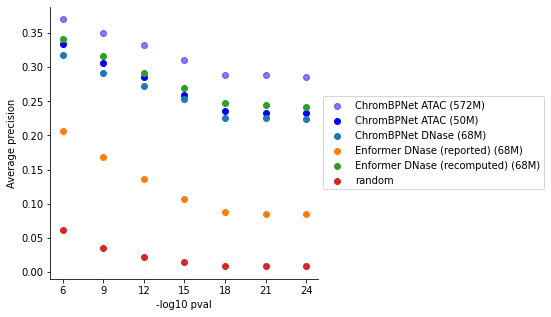

In [26]:

fig, ax = plt.subplots(figsize=(6,5))
colors = ["blue", "blue"]
alphas = [0.5, 1.0]
idx=0
for key in ["ChromBPNet ATAC (572M)", "ChromBPNet ATAC (50M)"]:
    ax.scatter(np.arange(6,25,3).astype(str), chrombpnet[key], label=key, c="blue", alpha=alphas[idx])
    idx+=1
    
key="ChromBPNet DNase (68M)"
ax.scatter(np.arange(6,25,3).astype(str), chrombpnet[key], label=key)
ax.scatter(np.arange(6,25,3).astype(str), enformer_dnase_roc_sar, label="Enformer DNase (reported) (68M)")
ax.scatter(np.arange(6,25,3).astype(str), enformer_dnase_roc, label="Enformer DNase (recomputed) (68M)")

ax.scatter(np.arange(6,25,3).astype(str), random_bc, label="random")

ax.spines[["top", "right"]].set_visible(False)
ax.set_xlabel("-log10 pval")
ax.set_ylabel("Average precision")
#plt.legend(loc='upper right')

# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))


#plt.savefig("subfigs/afr_caqtls_auprc_compare.pdf", transparent=True, dpi=300)

# Pearsonr (benchmarking)

In [124]:
dataf = afrs
pearsonrs = []

dataf['enformer_recomputed'] = -1*dataf['enformer_recomputed']
keyd='chrombpnet.encsr637xsc.variantscore.logfc'
print("ChromBPNet ATAC: ", np.round(scipy.stats.pearsonr(dataf[keyd][dataf["label"]==1], dataf["beta"][dataf["label"]==1])[0],2))
pearsonrs.append(np.round(scipy.stats.pearsonr(dataf[keyd][dataf["label"]==1], dataf["beta"][dataf["label"]==1])[0],2))

keyd='chrombpnet.encsr637xsc_50m.variantscore.logfc'
print("ChromBPNet ATAC (50M): ", np.round(scipy.stats.pearsonr(dataf[keyd][dataf["label"]==1], dataf["beta"][dataf["label"]==1])[0],2))
pearsonrs.append(np.round(scipy.stats.pearsonr(dataf[keyd][dataf["label"]==1], dataf["beta"][dataf["label"]==1])[0],2))

keyd='chrombpnet.encsr000emt.variantscore.logfc'
print("ChromBPNet DNase: ", np.round(scipy.stats.pearsonr(dataf[keyd][dataf["label"]==1], dataf["beta"][dataf["label"]==1])[0],2))
pearsonrs.append(np.round(scipy.stats.pearsonr(dataf[keyd][dataf["label"]==1], dataf["beta"][dataf["label"]==1])[0],2))

keyd='enformer_recomputed'
print("Enformer: ",np.round(scipy.stats.pearsonr(dataf[keyd][dataf["label"]==1], dataf["beta"][dataf["label"]==1])[0],2))
pearsonrs.append(np.round(scipy.stats.pearsonr(dataf[keyd][dataf["label"]==1], dataf["beta"][dataf["label"]==1])[0],2))

keyd='enformer.encsr000emt.variantscore.sar'
print("Enformer: ",np.round(scipy.stats.pearsonr(dataf[keyd][dataf["label"]==1], dataf["beta"][dataf["label"]==1])[0],2))
pearsonrs.append(np.round(scipy.stats.pearsonr(dataf[keyd][dataf["label"]==1], dataf["beta"][dataf["label"]==1])[0],2))

keyd='chrombpnet.encsr637xsc.variantscore.logfc'
print("ChromBPNet ATAC: ", scipy.stats.pearsonr(dataf[keyd][dataf["label"]==1], dataf["beta"][dataf["label"]==1])[1])
keyd='chrombpnet.encsr637xsc_50m.variantscore.logfc'
print("ChromBPNet ATAC: ", scipy.stats.pearsonr(dataf[keyd][dataf["label"]==1], dataf["beta"][dataf["label"]==1])[1])
keyd='chrombpnet.encsr000emt.variantscore.logfc'
print("ChromBPNet DNase: ", scipy.stats.pearsonr(dataf[keyd][dataf["label"]==1], dataf["beta"][dataf["label"]==1])[1])
keyd='enformer_recomputed'
print("Enformer: ", scipy.stats.pearsonr(dataf[keyd][dataf["label"]==1], dataf["beta"][dataf["label"]==1])[1])
keyd='enformer.encsr000emt.variantscore.sar'
print("Enformer: ", scipy.stats.pearsonr(dataf[keyd][dataf["label"]==1], dataf["beta"][dataf["label"]==1])[1])



ChromBPNet ATAC:  0.69
ChromBPNet ATAC (50M):  0.67
ChromBPNet DNase:  0.68
Enformer:  0.63
Enformer:  0.48
ChromBPNet ATAC:  0.0
ChromBPNet ATAC:  0.0
ChromBPNet DNase:  0.0
Enformer:  0.0
Enformer:  0.0


In [125]:
pearsonr_abs = []
keyd='chrombpnet.encsr637xsc.variantscore.logfc'
print("ChromBPNet ATAC: ", np.round(scipy.stats.pearsonr(abs(dataf[keyd])[dataf["label"]==1], abs(dataf["beta"])[dataf["label"]==1])[0],2))
pearsonr_abs.append(np.round(scipy.stats.pearsonr(abs(dataf[keyd])[dataf["label"]==1], abs(dataf["beta"])[dataf["label"]==1])[0],2))

keyd='chrombpnet.encsr637xsc_50m.variantscore.logfc'
print("ChromBPNet ATAC (50M): ", np.round(scipy.stats.pearsonr(abs(dataf[keyd])[dataf["label"]==1], abs(dataf["beta"])[dataf["label"]==1])[0],2))
pearsonr_abs.append(np.round(scipy.stats.pearsonr(abs(dataf[keyd])[dataf["label"]==1], abs(dataf["beta"])[dataf["label"]==1])[0],2))

keyd='chrombpnet.encsr000emt.variantscore.logfc'
print("ChromBPNet DNase: ", np.round(scipy.stats.pearsonr(abs(dataf[keyd])[dataf["label"]==1], abs(dataf["beta"])[dataf["label"]==1])[0],2))
pearsonr_abs.append(np.round(scipy.stats.pearsonr(abs(dataf[keyd])[dataf["label"]==1], abs(dataf["beta"])[dataf["label"]==1])[0],2))

keyd='enformer_recomputed'
print("Enformer: ", np.round(scipy.stats.pearsonr(abs(dataf[keyd])[dataf["label"]==1], abs(dataf["beta"])[dataf["label"]==1])[0],2))
pearsonr_abs.append(np.round(scipy.stats.pearsonr(abs(dataf[keyd])[dataf["label"]==1], abs(dataf["beta"])[dataf["label"]==1])[0],2))

keyd='enformer.encsr000emt.variantscore.sar'
print("Enformer: ", np.round(scipy.stats.pearsonr(abs(dataf[keyd])[dataf["label"]==1], abs(dataf["beta"])[dataf["label"]==1])[0],2))
pearsonr_abs.append(np.round(scipy.stats.pearsonr(abs(dataf[keyd])[dataf["label"]==1], abs(dataf["beta"])[dataf["label"]==1])[0],2))


keyd='chrombpnet.encsr637xsc.variantscore.logfc'
print("ChromBPNet ATAC: ", scipy.stats.pearsonr(abs(dataf[keyd])[dataf["label"]==1], abs(dataf["beta"])[dataf["label"]==1])[1])
keyd='chrombpnet.encsr637xsc_50m.variantscore.logfc'
print("ChromBPNet ATAC: ", scipy.stats.pearsonr(abs(dataf[keyd])[dataf["label"]==1], abs(dataf["beta"])[dataf["label"]==1])[1])
keyd='chrombpnet.encsr000emt.variantscore.logfc'
print("ChromBPNet DNase: ", scipy.stats.pearsonr(abs(dataf[keyd])[dataf["label"]==1], abs(dataf["beta"])[dataf["label"]==1])[1])
keyd='enformer_recomputed'
print("Enformer SAD: ", scipy.stats.pearsonr(abs(dataf[keyd])[dataf["label"]==1], abs(dataf["beta"])[dataf["label"]==1])[1])
keyd='enformer.encsr000emt.variantscore.sar'
print("Enformer SAR: ", scipy.stats.pearsonr(abs(dataf[keyd])[dataf["label"]==1], abs(dataf["beta"])[dataf["label"]==1])[1])


ChromBPNet ATAC:  0.38
ChromBPNet ATAC (50M):  0.35
ChromBPNet DNase:  0.37
Enformer:  0.29
Enformer:  0.12
ChromBPNet ATAC:  3.385725386748927e-278
ChromBPNet ATAC:  3.224363455097045e-246
ChromBPNet DNase:  2.7850970670387657e-263
Enformer SAD:  9.244826958911604e-165
Enformer SAR:  4.206300602432501e-28


In [126]:
df= pd.DataFrame()

df["pearsonr"] = pearsonrs + pearsonr_abs
df["method"] = ["ChromBPNet ATAC (500M)", "ChromBPNet ATAC (50M)", "ChromBPNet DNase (68M)", "Enformer (recomputed) DNase (68M)", "Enformer (reported) DNase (68M)"] + ["ChromBPNet ATAC (500M)", "ChromBPNet ATAC (50M)", "ChromBPNet DNase (68M)", "Enformer (recomputed) DNase (68M)", "Enformer (reported) DNase (68M)"]
df["scoring"] = ["signed"]*len(pearsonrs) + ["unsigned"]*len(pearsonr_abs)
df["score"] = ["logfc"] * df.shape[0]
df["pearsonr"] = df["pearsonr"].astype(float)
df

,pearsonr,method,scoring,score
0,0.69,ChromBPNet ATAC (500M),signed,logfc
1,0.67,ChromBPNet ATAC (50M),signed,logfc
2,0.68,ChromBPNet DNase (68M),signed,logfc
3,0.63,Enformer (recomputed) DNase (68M),signed,logfc
4,0.48,Enformer (reported) DNase (68M),signed,logfc
5,0.38,ChromBPNet ATAC (500M),unsigned,logfc
6,0.35,ChromBPNet ATAC (50M),unsigned,logfc
7,0.37,ChromBPNet DNase (68M),unsigned,logfc
8,0.29,Enformer (recomputed) DNase (68M),unsigned,logfc
9,0.12,Enformer (reported) DNase (68M),unsigned,logfc


In [127]:
dataf = afrs
pearsonrs = []
keyd='chrombpnet.encsr637xsc.variantscore.jsd'
print("ChromBPNet ATAC: ", np.round(scipy.stats.pearsonr(dataf[keyd][dataf["label"]==1], dataf["beta"][dataf["label"]==1])[0],2))
pearsonrs.append(np.round(scipy.stats.pearsonr(dataf[keyd][dataf["label"]==1], dataf["beta"][dataf["label"]==1])[0],2))

keyd='chrombpnet.encsr637xsc_50m.variantscore.jsd'
print("ChromBPNet ATAC (50M): ", np.round(scipy.stats.pearsonr(dataf[keyd][dataf["label"]==1], dataf["beta"][dataf["label"]==1])[0],2))
pearsonrs.append(np.round(scipy.stats.pearsonr(dataf[keyd][dataf["label"]==1], dataf["beta"][dataf["label"]==1])[0],2))

keyd='chrombpnet.encsr000emt.variantscore.jsd'
print("ChromBPNet DNase: ", np.round(scipy.stats.pearsonr(dataf[keyd][dataf["label"]==1], dataf["beta"][dataf["label"]==1])[0],2))
pearsonrs.append(np.round(scipy.stats.pearsonr(dataf[keyd][dataf["label"]==1], dataf["beta"][dataf["label"]==1])[0],2))

keyd='chrombpnet.encsr637xsc.variantscore.jsd'
print("ChromBPNet ATAC: ", scipy.stats.pearsonr(dataf[keyd][dataf["label"]==1], dataf["beta"][dataf["label"]==1])[1])
keyd='chrombpnet.encsr637xsc_50m.variantscore.jsd'
print("ChromBPNet ATAC: ", scipy.stats.pearsonr(dataf[keyd][dataf["label"]==1], dataf["beta"][dataf["label"]==1])[1])
keyd='chrombpnet.encsr000emt.variantscore.jsd'
print("ChromBPNet DNase: ", scipy.stats.pearsonr(dataf[keyd][dataf["label"]==1], dataf["beta"][dataf["label"]==1])[1])



ChromBPNet ATAC:  0.66
ChromBPNet ATAC (50M):  0.65
ChromBPNet DNase:  0.67
ChromBPNet ATAC:  0.0
ChromBPNet ATAC:  0.0
ChromBPNet DNase:  0.0


In [128]:
pearsonr_abs = []
keyd='chrombpnet.encsr637xsc.variantscore.jsd'
print("ChromBPNet ATAC: ", np.round(scipy.stats.pearsonr(abs(dataf[keyd])[dataf["label"]==1], abs(dataf["beta"])[dataf["label"]==1])[0],2))
pearsonr_abs.append(np.round(scipy.stats.pearsonr(abs(dataf[keyd])[dataf["label"]==1], abs(dataf["beta"])[dataf["label"]==1])[0],2))

keyd='chrombpnet.encsr637xsc_50m.variantscore.jsd'
print("ChromBPNet ATAC (50M): ", np.round(scipy.stats.pearsonr(abs(dataf[keyd])[dataf["label"]==1], abs(dataf["beta"])[dataf["label"]==1])[0],2))
pearsonr_abs.append(np.round(scipy.stats.pearsonr(abs(dataf[keyd])[dataf["label"]==1], abs(dataf["beta"])[dataf["label"]==1])[0],2))

keyd='chrombpnet.encsr000emt.variantscore.jsd'
print("ChromBPNet DNase: ", np.round(scipy.stats.pearsonr(abs(dataf[keyd])[dataf["label"]==1], abs(dataf["beta"])[dataf["label"]==1])[0],2))
pearsonr_abs.append(np.round(scipy.stats.pearsonr(abs(dataf[keyd])[dataf["label"]==1], abs(dataf["beta"])[dataf["label"]==1])[0],2))


keyd='chrombpnet.encsr637xsc.variantscore.jsd'
print("ChromBPNet ATAC: ", scipy.stats.pearsonr(abs(dataf[keyd])[dataf["label"]==1], abs(dataf["beta"])[dataf["label"]==1])[1])
keyd='chrombpnet.encsr637xsc_50m.variantscore.jsd'
print("ChromBPNet ATAC: ", scipy.stats.pearsonr(abs(dataf[keyd])[dataf["label"]==1], abs(dataf["beta"])[dataf["label"]==1])[1])
keyd='chrombpnet.encsr000emt.variantscore.jsd'
print("ChromBPNet DNase: ", scipy.stats.pearsonr(abs(dataf[keyd])[dataf["label"]==1], abs(dataf["beta"])[dataf["label"]==1])[1])


ChromBPNet ATAC:  0.32
ChromBPNet ATAC (50M):  0.31
ChromBPNet DNase:  0.33
ChromBPNet ATAC:  1.3703003278465646e-193
ChromBPNet ATAC:  3.874155173698438e-181
ChromBPNet DNase:  2.1062604760967424e-206


In [129]:
df1= pd.DataFrame()

df1["pearsonr"] = pearsonrs + pearsonr_abs
df1["method"] = ["ChromBPNet ATAC (500M)", "ChromBPNet ATAC (50M)", "ChromBPNet DNase (68M)"] + ["ChromBPNet ATAC (500M)", "ChromBPNet ATAC (50M)", "ChromBPNet DNase (68M)"]
df1["scoring"] = ["signed"]*len(pearsonrs) + ["unsigned"]*len(pearsonr_abs)
df1["score"] = ["jsd"] * df1.shape[0]
df1["pearsonr"] = df["pearsonr"].astype(float)
df1

,pearsonr,method,scoring,score
0,0.69,ChromBPNet ATAC (500M),signed,jsd
1,0.67,ChromBPNet ATAC (50M),signed,jsd
2,0.68,ChromBPNet DNase (68M),signed,jsd
3,0.63,ChromBPNet ATAC (500M),unsigned,jsd
4,0.48,ChromBPNet ATAC (50M),unsigned,jsd
5,0.38,ChromBPNet DNase (68M),unsigned,jsd


In [130]:
df = pd.concat((df, df1))

In [131]:
df

,pearsonr,method,scoring,score
0,0.69,ChromBPNet ATAC (500M),signed,logfc
1,0.67,ChromBPNet ATAC (50M),signed,logfc
2,0.68,ChromBPNet DNase (68M),signed,logfc
3,0.63,Enformer (recomputed) DNase (68M),signed,logfc
4,0.48,Enformer (reported) DNase (68M),signed,logfc
5,0.38,ChromBPNet ATAC (500M),unsigned,logfc
6,0.35,ChromBPNet ATAC (50M),unsigned,logfc
7,0.37,ChromBPNet DNase (68M),unsigned,logfc
8,0.29,Enformer (recomputed) DNase (68M),unsigned,logfc
9,0.12,Enformer (reported) DNase (68M),unsigned,logfc


0    0.69
1    0.67
2    0.68
3    0.63
4    0.48
5    0.38
6    0.35
7    0.37
8    0.29
9    0.12
0    0.69
1    0.67
2    0.68
3    0.63
4    0.48
5    0.38
Name: pearsonr, dtype: float64
{'ChromBPNet DNase (68M)', 'Enformer (recomputed) DNase (68M)', 'ChromBPNet ATAC (50M)', 'Enformer (reported) DNase (68M)', 'ChromBPNet ATAC (500M)'}


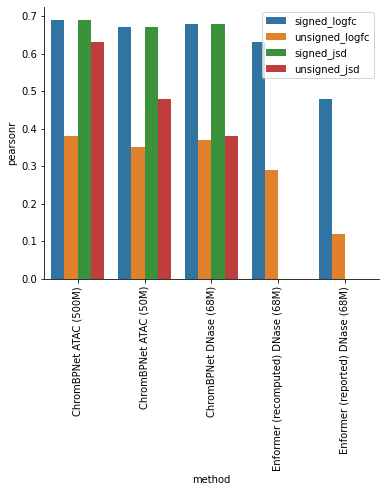

In [132]:
import seaborn as sns
import matplotlib
plt.figure(figsize=(6,5))

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42 
print(df["pearsonr"])
df["scoring-methods"] = df["scoring"] + "_" +  df["score"]
ax = sns.barplot(data=df, x="method", y="pearsonr", hue="scoring-methods")
print(set(df["method"]))
xtix = ["ChromBPNet ATAC (500M)", "ChromBPNet ATAC (50M)", "ChromBPNet DNase (68M)", "Enformer (recomputed) DNase (68M)", "Enformer (reported) DNase (68M)"]
ax.set_xticklabels(labels=xtix, rotation=90)
ax.spines[["top", "right"]].set_visible(False)

ax.legend(loc="upper right")

(0.6900002588055183, 0.0)


Text(0.5, 1.0, 'Pearsonr = 0.69')

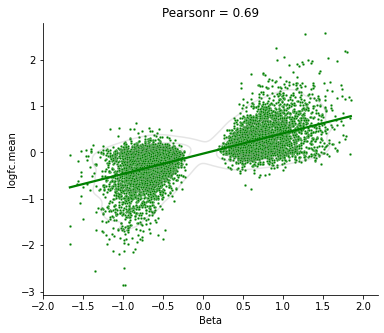

In [133]:

   
data = pd.DataFrame()
data["logfc.mean"] = afrs[afrs["label"]==1]["chrombpnet.encsr637xsc.variantscore.logfc"]
data["Beta"] = afrs[afrs["label"]==1]["beta"]

plt.figure(figsize=(6,5))

sns.kdeplot(
    data=data,
    x="Beta",
    y="logfc.mean",
    levels=5,
    fill=False,
    alpha=0.2,
    color="grey",
    cut=2,

)


ax = sns.scatterplot(x="Beta", y="logfc.mean", data=data, s=6, color="green", rasterized=True)
sns.regplot(x="Beta", y="logfc.mean", data=data, scatter=False, ci=None, color="green")
ax.spines[["top", "right"]].set_visible(False)

atc_pear = scipy.stats.pearsonr(data["logfc.mean"],data["Beta"])
print(atc_pear)
ax.set_title("Pearsonr = "+str(np.round(atc_pear[0],2)))


#plt.savefig("subfigs/afr_caqtls_pearsonr.pdf", transparent=True, dpi=300)

(0.4729085713163014, 0.0)


Text(0.5, 1.0, 'Pearsonr = 0.47')

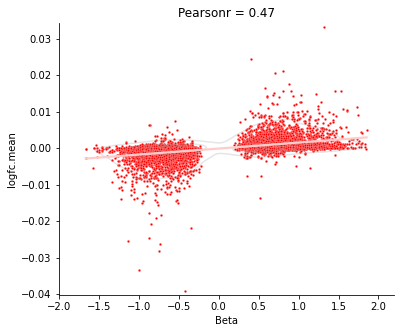

In [134]:

   
data = pd.DataFrame()
data["logfc.mean"] = dataf[dataf["label"]==1]["enformer.encsr000emt.variantscore.sad"]
data["Beta"] = dataf[dataf["label"]==1]["beta"]

plt.figure(figsize=(6,5))

sns.kdeplot(
    data=data,
    x="Beta",
    y="logfc.mean",
    levels=5,
    fill=False,
    alpha=0.2,
    color="grey",
    cut=2,

)


ax = sns.scatterplot(x="Beta", y="logfc.mean", data=data, s=6, color="Red")
sns.regplot(x="Beta", y="logfc.mean", data=data, scatter=False, ci=None, color="#ffcccb")
ax.spines[["top", "right"]].set_visible(False)

atc_pear = scipy.stats.pearsonr(data["logfc.mean"],data["Beta"])
print(atc_pear)
ax.set_title("Pearsonr = "+str(np.round(atc_pear[0],2)))



In [135]:
import scipy.stats



chrombpnet = {}
chrombpnet_unsigned = {}
enformer = []
enformer_unsigned = []
enformer_sar = []
enformer_unsigned_sar = []
chrombpnet["ChromBPNet DNase (68M)"] = []
chrombpnet["ChromBPNet ATAC (572M)"] = []
chrombpnet["ChromBPNet ATAC (50M)"] = []

chrombpnet_unsigned["ChromBPNet DNase (68M)"] = []
chrombpnet_unsigned["ChromBPNet ATAC (572M)"] = []
chrombpnet_unsigned["ChromBPNet ATAC (50M)"] = []

for threshold in np.arange(6,25,3):
    threshold = 1 / (10**(threshold))
    print(threshold)
    dataf = afrs[afrs["pval"]<threshold]

      
    pear = scipy.stats.pearsonr(dataf["chrombpnet.encsr000emt.variantscore.logfc"], dataf["beta"])
    chrombpnet["ChromBPNet DNase (68M)"].append(pear[0])
    
    pear = scipy.stats.pearsonr(abs(dataf["chrombpnet.encsr000emt.variantscore.logfc"]), abs(dataf["beta"]))
    chrombpnet_unsigned["ChromBPNet DNase (68M)"].append(pear[0])    
 
    pear = scipy.stats.pearsonr(dataf["chrombpnet.encsr637xsc.variantscore.logfc"], dataf["beta"])
    chrombpnet["ChromBPNet ATAC (572M)"].append(pear[0])
    
    pear = scipy.stats.pearsonr(abs(dataf["chrombpnet.encsr637xsc.variantscore.logfc"]), abs(dataf["beta"]))
    chrombpnet_unsigned["ChromBPNet ATAC (572M)"].append(pear[0])    

    pear = scipy.stats.pearsonr(dataf["chrombpnet.encsr637xsc_50m.variantscore.logfc"], dataf["beta"])
    chrombpnet["ChromBPNet ATAC (50M)"].append(pear[0])
    
    pear = scipy.stats.pearsonr(abs(dataf["chrombpnet.encsr637xsc_50m.variantscore.logfc"]), abs(dataf["beta"]))
    chrombpnet_unsigned["ChromBPNet ATAC (50M)"].append(pear[0])
    
    pear = scipy.stats.pearsonr(dataf["enformer_recomputed"], dataf["beta"])
    enformer.append(pear[0])
    
    pear = scipy.stats.pearsonr(abs(dataf["enformer_recomputed"]), abs(dataf["beta"]))
    enformer_unsigned.append(pear[0])

    pear = scipy.stats.pearsonr(dataf["enformer.encsr000emt.variantscore.sar"], dataf["beta"])
    enformer_sar.append(pear[0])
    
    pear = scipy.stats.pearsonr(abs(dataf["enformer.encsr000emt.variantscore.sar"]), abs(dataf["beta"]))
    enformer_unsigned_sar.append(pear[0])


1e-06
1e-09
1e-12
1e-15
1e-18
2.5800991659088344e-19
4.990607165261473e-19


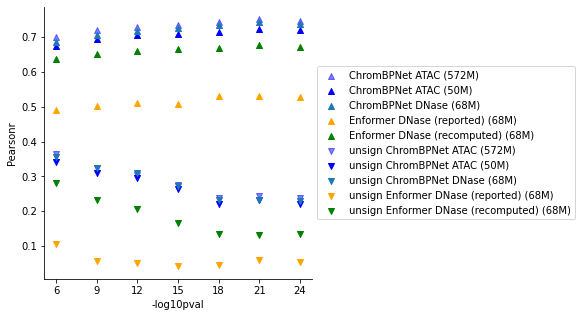

In [136]:
fig, ax = plt.subplots(figsize=(6,5))

colors = ["blue", "blue", "C0"]
alphas= [0.5, 1.0, 1.0, 1.0] 

i=0
for key in ["ChromBPNet ATAC (572M)", "ChromBPNet ATAC (50M)", "ChromBPNet DNase (68M)"]:
    ax.scatter(np.arange(6,25,3).astype(str), chrombpnet[key], marker="^", label=key, color=colors[i], alpha=alphas[i])
    i+=1
    print(chrombpnet[key])


ax.scatter(np.arange(6,25,3).astype(str), enformer_sar ,  marker="^", label="Enformer DNase (reported) (68M)", color="orange")
ax.scatter(np.arange(6,25,3).astype(str), enformer ,  marker="^", label="Enformer DNase (recomputed) (68M)", color="green")

i=0
for key in ["ChromBPNet ATAC (572M)", "ChromBPNet ATAC (50M)", "ChromBPNet DNase (68M)"]:
    ax.scatter(np.arange(6,25,3).astype(str), chrombpnet_unsigned[key], marker="v", label="unsign "+key, color=colors[i], alpha=alphas[i])
    i+=1
    
ax.scatter(np.arange(6,25,3).astype(str), enformer_unsigned_sar, marker="v", label="unsign " +"Enformer DNase (reported) (68M)", color="orange")
ax.scatter(np.arange(6,25,3).astype(str), enformer_unsigned, marker="v", label="unsign " +"Enformer DNase (recomputed) (68M)", color="green")


ax.spines[["top", "right"]].set_visible(False)
ax.set_xlabel("-log10pval")
ax.set_ylabel("Pearsonr")
#plt.legend(loc='upper right')

# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

#plt.show()

#plt.savefig("subfigs/afr_caqtls_pearsonr_compare.pdf", transparent=True, dpi=300)


In [137]:
import scipy.stats



chrombpnet = {}
chrombpnet_unsigned = {}

chrombpnet["ChromBPNet DNase (68M)"] = []
chrombpnet["ChromBPNet ATAC (572M)"] = []
chrombpnet["ChromBPNet ATAC (50M)"] = []

chrombpnet_unsigned["ChromBPNet DNase (68M)"] = []
chrombpnet_unsigned["ChromBPNet ATAC (572M)"] = []
chrombpnet_unsigned["ChromBPNet ATAC (50M)"] = []

for threshold in np.arange(6,25,3):
    threshold = 1 / (10**(threshold))
    print(threshold)
    dataf = afrs[afrs["pval"]<threshold]

      
    pear = scipy.stats.pearsonr(dataf["chrombpnet.encsr000emt.variantscore.jsd"], dataf["beta"])
    chrombpnet["ChromBPNet DNase (68M)"].append(pear[0])
    
    pear = scipy.stats.pearsonr(abs(dataf["chrombpnet.encsr000emt.variantscore.jsd"]), abs(dataf["beta"]))
    chrombpnet_unsigned["ChromBPNet DNase (68M)"].append(pear[0])    
 
    pear = scipy.stats.pearsonr(dataf["chrombpnet.encsr637xsc.variantscore.jsd"], dataf["beta"])
    chrombpnet["ChromBPNet ATAC (572M)"].append(pear[0])
    
    pear = scipy.stats.pearsonr(abs(dataf["chrombpnet.encsr637xsc.variantscore.jsd"]), abs(dataf["beta"]))
    chrombpnet_unsigned["ChromBPNet ATAC (572M)"].append(pear[0])    

    pear = scipy.stats.pearsonr(dataf["chrombpnet.encsr637xsc_50m.variantscore.jsd"], dataf["beta"])
    chrombpnet["ChromBPNet ATAC (50M)"].append(pear[0])
    
    pear = scipy.stats.pearsonr(abs(dataf["chrombpnet.encsr637xsc_50m.variantscore.jsd"]), abs(dataf["beta"]))
    chrombpnet_unsigned["ChromBPNet ATAC (50M)"].append(pear[0])
    


1e-06
1e-09
1e-12
1e-15
1e-18
2.5800991659088344e-19
4.990607165261473e-19


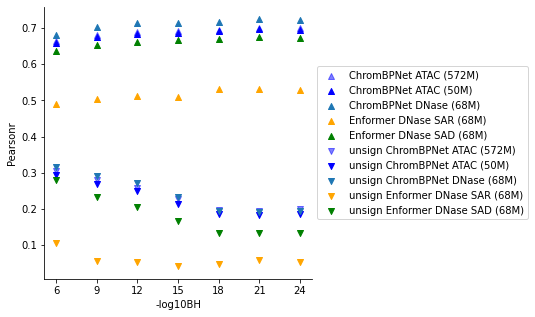

In [138]:
fig, ax = plt.subplots(figsize=(6,5))

colors = ["blue", "blue", "C0"]
alphas= [0.5, 1.0, 1.0, 1.0] 


i=0
for key in ["ChromBPNet ATAC (572M)", "ChromBPNet ATAC (50M)", "ChromBPNet DNase (68M)"]:
    ax.scatter(np.arange(6,25,3).astype(str), chrombpnet[key], marker="^", label=key, color=colors[i], alpha=alphas[i])
    i+=1


ax.scatter(np.arange(6,25,3).astype(str), enformer_sar ,  marker="^", label="Enformer DNase SAR (68M)", color="orange")
ax.scatter(np.arange(6,25,3).astype(str), enformer ,  marker="^", label="Enformer DNase SAD (68M)", color="green")

i=0
for key in ["ChromBPNet ATAC (572M)", "ChromBPNet ATAC (50M)", "ChromBPNet DNase (68M)"]:
    ax.scatter(np.arange(6,25,3).astype(str), chrombpnet_unsigned[key], marker="v", label="unsign "+key, color=colors[i], alpha=alphas[i])
    i+=1
    
ax.scatter(np.arange(6,25,3).astype(str), enformer_unsigned_sar, marker="v", label="unsign " +"Enformer DNase SAR (68M)", color="orange")
ax.scatter(np.arange(6,25,3).astype(str), enformer_unsigned, marker="v", label="unsign " +"Enformer DNase SAD (68M)", color="green")


ax.spines[["top", "right"]].set_visible(False)
ax.set_xlabel("-log10BH")
ax.set_ylabel("Pearsonr")
#plt.legend(loc='upper right')

# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

#plt.show()

#plt.savefig("subfigs/afr_caqtls_pearsonr_compare_jsd.pdf", transparent=True, dpi=300)


# Pearsonr (across-ancestry)

In [25]:
dataf = afrs[afrs["label"]==1]
dataf.columns
 

Index(['chr_hg38', 'pos_hg38', 'allele1', 'allele2', 'snp_id', 'label',
       'IsUsed', 'pval', 'beta', 'enformer.encsr000emt.variantscore.sad',
       'enformer.encsr000emt.variantscore.sar',
       'chrombpnet.gambian.variantscore.logfc',
       'chrombpnet.gambian.variantscore.jsd',
       'chrombpnet.esan.variantscore.logfc',
       'chrombpnet.esan.variantscore.jsd',
       'chrombpnet.mende.variantscore.logfc',
       'chrombpnet.mende.variantscore.jsd',
       'chrombpnet.yoruba.variantscore.logfc',
       'chrombpnet.yoruba.variantscore.jsd',
       'chrombpnet.maasai.variantscore.logfc',
       'chrombpnet.maasai.variantscore.jsd',
       'chrombpnet.luhya.variantscore.logfc',
       'chrombpnet.luhya.variantscore.jsd',
       'chrombpnet.encsr637xsc.variantscore.logfc',
       'chrombpnet.encsr637xsc.variantscore.jsd',
       'chrombpnet.encsr637xsc.variantscore.csr',
       'chrombpnet.encsr637xsc.variantscore.pval',
       'chrombpnet.encsr000emt.variantscore.logfc',
     

In [26]:
anscs = dataf.columns[11:-6].tolist()
anscs = [ans.split(".")[1] for ans in anscs]
anscs = set(anscs)
print(anscs)

{'esan', 'luhya', 'encsr637xsc_50m', 'mende', 'yoruba', 'maasai', 'encsr095qnb', 'gambian', 'encsr000emt', 'encsr637xsc'}


In [27]:

ancestries = []

for ans in anscs:
    if ans=="eur":
        continue
    if ans=="afr":
        continue
    if ans == "GM12878":
        for title in ["encsr637xsc", "encsr000emt", "encsr637xsc_50m", "encsr000emt.ENCSR095QNB" ]:
            ancestries.append(ans+title)
    else:
        ancestries.append(ans)
    
abs_logfc_dict = {x: [] for x in ancestries}
abs_logfc_dict['ancestry'] = []

for outer_ancestry in ancestries:
    abs_logfc_dict['ancestry'].append(outer_ancestry)
    for ancestry in ancestries:
        #print("chrombpnet.encsr637xsc.variantscore.logfc".replace("encsr637xsc", ancestry))

        abs_logfc_dict[ancestry].append(scipy.stats.pearsonr(dataf["chrombpnet.encsr637xsc.variantscore.logfc".replace("encsr637xsc", outer_ancestry)],
                                                 dataf["chrombpnet.encsr637xsc.variantscore.logfc".replace("encsr637xsc", ancestry)])[0])
        
abs_logfc_df = pd.DataFrame(abs_logfc_dict)
abs_logfc_df.set_index('ancestry', inplace=True)

abs_logfc_df    


,esan,luhya,encsr637xsc_50m,mende,yoruba,maasai,encsr095qnb,gambian,encsr000emt,encsr637xsc
ancestry,,,,,,,,,,
esan,1.000000,0.967219,0.931925,0.968802,0.969716,0.961665,0.926250,0.965039,0.938818,0.947346
luhya,0.967219,1.000000,0.933962,0.969444,0.970310,0.968970,0.929342,0.969731,0.939227,0.948864
encsr637xsc_50m,0.931925,0.933962,1.000000,0.938928,0.927798,0.929949,0.957399,0.934693,0.951317,0.965801
mende,0.968802,0.969444,0.938928,1.000000,0.968804,0.965864,0.933363,0.972593,0.946330,0.953242
yoruba,0.969716,0.970310,0.927798,0.968804,1.000000,0.964676,0.927679,0.968421,0.934047,0.947957
maasai,0.961665,0.968970,0.929949,0.965864,0.964676,1.000000,0.920529,0.967941,0.942865,0.941758
encsr095qnb,0.926250,0.929342,0.957399,0.933363,0.927679,0.920529,1.000000,0.931529,0.922027,0.961778
gambian,0.965039,0.969731,0.934693,0.972593,0.968421,0.967941,0.931529,1.000000,0.946232,0.953597
encsr000emt,0.938818,0.939227,0.951317,0.946330,0.934047,0.942865,0.922027,0.946232,1.000000,0.942114


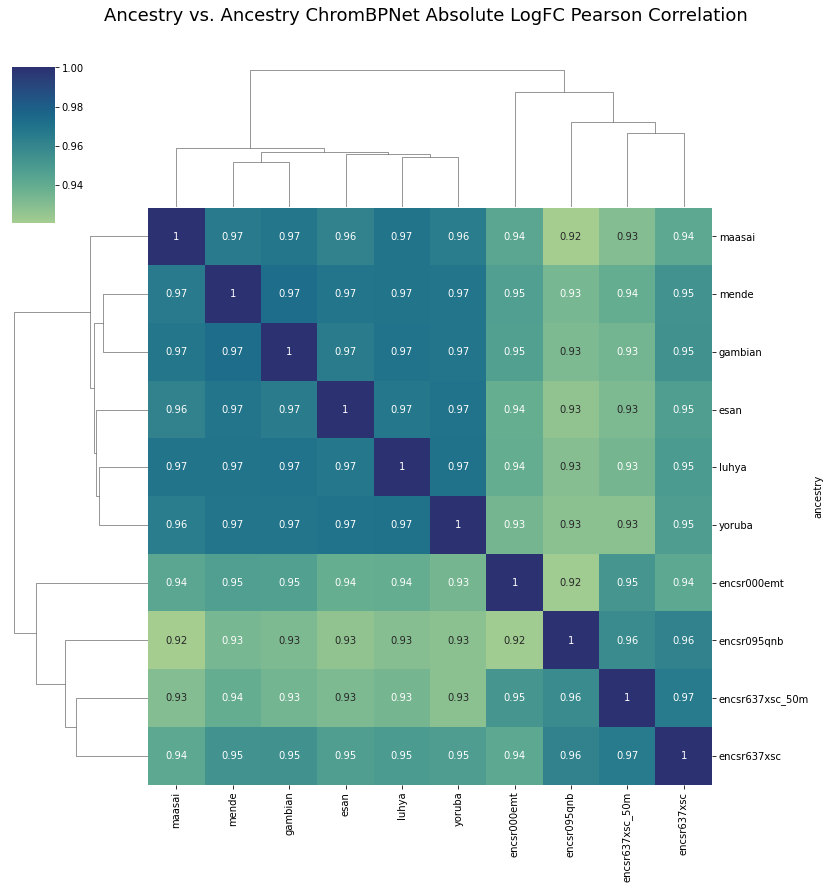

In [28]:
g = sns.clustermap(abs_logfc_df, annot=True, cmap="crest")
g.fig.set_figwidth(12)
g.fig.set_figheight(12)
g.fig.suptitle('Ancestry vs. Ancestry ChromBPNet Absolute LogFC Pearson Correlation', fontsize=18, y=1.05)

plt.savefig("subfigs/afr_caqtls_ancestry_logfc.pdf", transparent=True, dpi=300)


In [29]:

ancestries = []

for ans in anscs:
    if ans=="eur":
        continue
    if ans=="afr":
        continue
    if ans == "GM12878":
        for title in ["encsr637xsc", "encsr000emt", "encsr637xsc_50m", "encsr000emt.ENCSR095QNB" ]:
            ancestries.append(ans+title)
    else:
        ancestries.append(ans)
    
abs_logfc_dict = {x: [] for x in ancestries}
abs_logfc_dict['ancestry'] = []

for outer_ancestry in ancestries:
    print(outer_ancestry)
    abs_logfc_dict['ancestry'].append(outer_ancestry)
    for ancestry in ancestries:
        abs_logfc_dict[ancestry].append(scipy.stats.pearsonr(dataf["chrombpnet.encsr637xsc.variantscore.jsd".replace("encsr637xsc", outer_ancestry)],
                                                 dataf["chrombpnet.encsr637xsc.variantscore.jsd".replace("encsr637xsc", ancestry)])[0])
        
abs_logfc_df = pd.DataFrame(abs_logfc_dict)
abs_logfc_df.set_index('ancestry', inplace=True)

abs_logfc_df    


esan
luhya
encsr637xsc_50m
mende
yoruba
maasai
encsr095qnb
gambian
encsr000emt
encsr637xsc


,esan,luhya,encsr637xsc_50m,mende,yoruba,maasai,encsr095qnb,gambian,encsr000emt,encsr637xsc
ancestry,,,,,,,,,,
esan,1.000000,0.960769,0.944884,0.963115,0.961965,0.958645,0.941344,0.961508,0.923923,0.945075
luhya,0.960769,1.000000,0.946419,0.963569,0.965634,0.964181,0.940539,0.965961,0.926727,0.948717
encsr637xsc_50m,0.944884,0.946419,1.000000,0.946116,0.945635,0.945881,0.950975,0.950496,0.937292,0.969292
mende,0.963115,0.963569,0.946116,1.000000,0.966076,0.962352,0.942669,0.969161,0.932825,0.947684
yoruba,0.961965,0.965634,0.945635,0.966076,1.000000,0.960864,0.944662,0.965081,0.925010,0.950900
maasai,0.958645,0.964181,0.945881,0.962352,0.960864,1.000000,0.937487,0.967005,0.929940,0.945719
encsr095qnb,0.941344,0.940539,0.950975,0.942669,0.944662,0.937487,1.000000,0.945148,0.924156,0.957086
gambian,0.961508,0.965961,0.950496,0.969161,0.965081,0.967005,0.945148,1.000000,0.935592,0.950797
encsr000emt,0.923923,0.926727,0.937292,0.932825,0.925010,0.929940,0.924156,0.935592,1.000000,0.926494


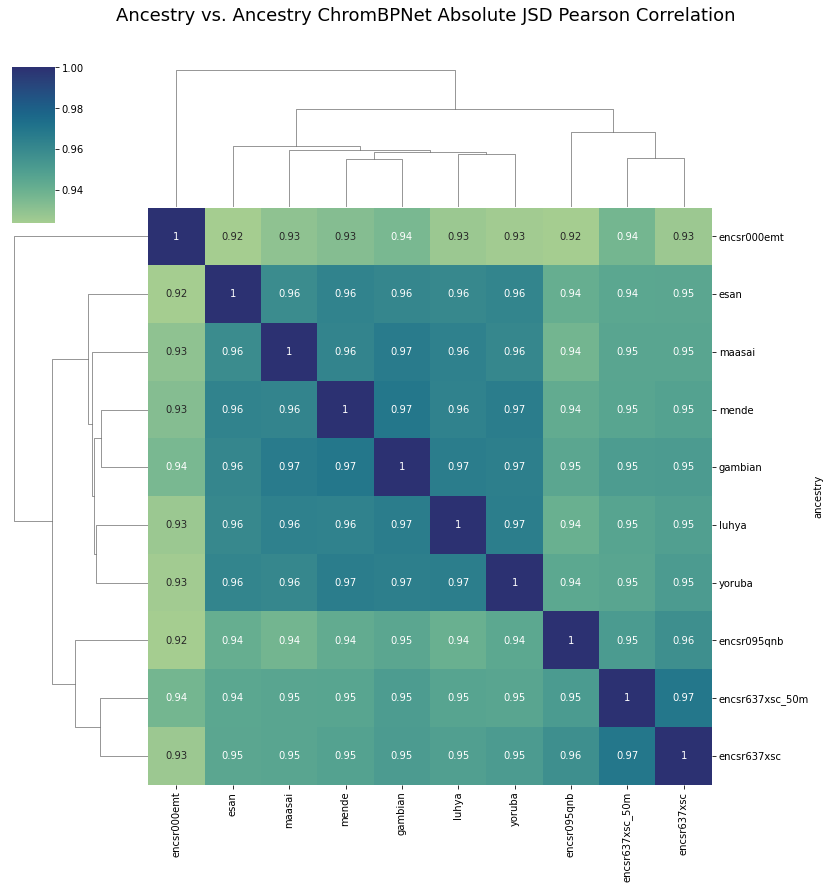

In [30]:
g = sns.clustermap(abs_logfc_df, annot=True, cmap="crest")
g.fig.set_figwidth(12)
g.fig.set_figheight(12)
g.fig.suptitle('Ancestry vs. Ancestry ChromBPNet Absolute JSD Pearson Correlation', fontsize=18, y=1.05)
plt.savefig("subfigs/afr_caqtls_ancestry_jsd.pdf", transparent=True, dpi=300)


In [31]:
dataf.shape

(8363, 45)

# Pearsonr (ASB)

In [32]:
asb_scores = pd.read_csv("Afr.ASB.CaQTLS.tsv", sep="\t", header=0)

In [33]:
asb_scores = asb_scores[asb_scores["IsUsed"]]

In [34]:
asb_scores.head()

,chr_hg38,pos_hg38,allele1,allele2,IsUsed,rsid,snp_id,meanLog2FC,GM12878.ENCSR637XSC.mean.logfc,GM12878.ENCSR637XSC.mean.sign.jsd,GM12878.ENCSR000EMT.mean.logfc,GM12878.ENCSR000EMT.mean.sign.jsd,GM12878.ENCSR637XSC.sub.50M.mean.logfc,GM12878.ENCSR637XSC.sub.50M.mean.sign.jsd
0,chr1,976215,A,G,True,1_976215_A_G,1_976215_A_G,-1.852605,-0.079329,-0.061612,0.051729,0.032590,0.075894,0.038511
3,chr1,1038819,T,C,True,1_1038819_C_T,1_1038819_C_T,2.390945,-0.223319,-0.023942,-0.044806,-0.014620,-0.109847,-0.020354
4,chr1,1038845,G,A,True,1_1038845_A_G,1_1038845_A_G,2.163432,0.441510,0.035797,0.253871,0.045086,0.377451,0.036387
5,chr1,1038916,G,A,True,1_1038916_A_G,1_1038916_A_G,2.062560,0.083078,0.013802,0.193501,0.028406,0.067928,0.010322
6,chr1,1038975,A,G,True,1_1038975_G_A,1_1038975_G_A,1.898451,-0.210283,-0.012515,-0.028861,-0.012718,-0.105511,-0.015877


In [35]:
pearsonrs = []
keyd='GM12878.ENCSR637XSC.mean.logfc'
print("ChromBPNet ATAC: ", np.round(scipy.stats.pearsonr(asb_scores[keyd], asb_scores["meanLog2FC"])[0],2))
pearsonrs.append(np.round(scipy.stats.pearsonr(asb_scores[keyd], asb_scores["meanLog2FC"])[0],2))

keyd='GM12878.ENCSR637XSC.sub.50M.mean.logfc'
print("ChromBPNet ATAC (50M): ", np.round(scipy.stats.pearsonr(asb_scores[keyd], asb_scores["meanLog2FC"])[0],2))
pearsonrs.append(np.round(scipy.stats.pearsonr(asb_scores[keyd], asb_scores["meanLog2FC"])[0],2))

keyd='GM12878.ENCSR000EMT.mean.logfc'
print("ChromBPNet DNase (68M): ", np.round(scipy.stats.pearsonr(asb_scores[keyd], asb_scores["meanLog2FC"])[0],2))
pearsonrs.append(np.round(scipy.stats.pearsonr(asb_scores[keyd], asb_scores["meanLog2FC"])[0],2))


keyd='GM12878.ENCSR637XSC.mean.logfc'
print("ChromBPNet ATAC: ", scipy.stats.pearsonr(asb_scores[keyd], asb_scores["meanLog2FC"])[1])
keyd='GM12878.ENCSR637XSC.sub.50M.mean.logfc'
print("ChromBPNet ATAC (50M): ", scipy.stats.pearsonr(asb_scores[keyd], asb_scores["meanLog2FC"])[1])
keyd='GM12878.ENCSR000EMT.mean.logfc'
print("ChromBPNet DNase (68M): ", scipy.stats.pearsonr(asb_scores[keyd], asb_scores["meanLog2FC"])[1])


keyd='GM12878.ENCSR637XSC.mean.sign.jsd'
print("ChromBPNet ATAC: ", np.round(scipy.stats.pearsonr(asb_scores[keyd], asb_scores["meanLog2FC"])[0],2))
pearsonrs.append(np.round(scipy.stats.pearsonr(asb_scores[keyd], asb_scores["meanLog2FC"])[0],2))

keyd='GM12878.ENCSR637XSC.sub.50M.mean.sign.jsd'
print("ChromBPNet ATAC (50M): ", np.round(scipy.stats.pearsonr(asb_scores[keyd], asb_scores["meanLog2FC"])[0],2))
pearsonrs.append(np.round(scipy.stats.pearsonr(asb_scores[keyd], asb_scores["meanLog2FC"])[0],2))

keyd='GM12878.ENCSR000EMT.mean.sign.jsd'
print("ChromBPNet DNase (68M): ", np.round(scipy.stats.pearsonr(asb_scores[keyd], asb_scores["meanLog2FC"])[0],2))
pearsonrs.append(np.round(scipy.stats.pearsonr(asb_scores[keyd], asb_scores["meanLog2FC"])[0],2))


keyd='GM12878.ENCSR637XSC.mean.sign.jsd'
print("ChromBPNet ATAC: ", scipy.stats.pearsonr(asb_scores[keyd], asb_scores["meanLog2FC"])[1])
keyd='GM12878.ENCSR637XSC.sub.50M.mean.sign.jsd'
print("ChromBPNet ATAC (50M): ", scipy.stats.pearsonr(asb_scores[keyd], asb_scores["meanLog2FC"])[1])
keyd='GM12878.ENCSR000EMT.mean.sign.jsd'
print("ChromBPNet DNase (68M): ", scipy.stats.pearsonr(asb_scores[keyd], asb_scores["meanLog2FC"])[1])


ChromBPNet ATAC:  0.68
ChromBPNet ATAC (50M):  0.67
ChromBPNet DNase (68M):  0.66
ChromBPNet ATAC:  0.0
ChromBPNet ATAC (50M):  0.0
ChromBPNet DNase (68M):  0.0
ChromBPNet ATAC:  0.66
ChromBPNet ATAC (50M):  0.66
ChromBPNet DNase (68M):  0.67
ChromBPNet ATAC:  0.0
ChromBPNet ATAC (50M):  0.0
ChromBPNet DNase (68M):  0.0


In [36]:
pearsonrs_abs = []
keyd='GM12878.ENCSR637XSC.mean.logfc'
print("ChromBPNet ATAC: ", np.round(scipy.stats.pearsonr(abs(asb_scores[keyd]), abs(asb_scores["meanLog2FC"]))[0],2))
pearsonrs_abs.append(np.round(scipy.stats.pearsonr(abs(asb_scores[keyd]), abs(asb_scores["meanLog2FC"]))[0],2))

keyd='GM12878.ENCSR637XSC.sub.50M.mean.logfc'
print("ChromBPNet ATAC (50M): ", np.round(scipy.stats.pearsonr(abs(asb_scores[keyd]), abs(asb_scores["meanLog2FC"]))[0],2))
pearsonrs_abs.append(np.round(scipy.stats.pearsonr(abs(asb_scores[keyd]), abs(asb_scores["meanLog2FC"]))[0],2))

keyd='GM12878.ENCSR000EMT.mean.logfc'
print("ChromBPNet DNase (68M): ", np.round(scipy.stats.pearsonr(abs(asb_scores[keyd]), abs(asb_scores["meanLog2FC"]))[0],2))
pearsonrs_abs.append(np.round(scipy.stats.pearsonr(abs(asb_scores[keyd]), abs(asb_scores["meanLog2FC"]))[0],2))


keyd='GM12878.ENCSR637XSC.mean.logfc'
print("ChromBPNet ATAC: ", scipy.stats.pearsonr(abs(asb_scores[keyd]), abs(asb_scores["meanLog2FC"]))[1])
keyd='GM12878.ENCSR637XSC.sub.50M.mean.logfc'
print("ChromBPNet ATAC (50M): ", scipy.stats.pearsonr(abs(asb_scores[keyd]), abs(asb_scores["meanLog2FC"]))[1])
keyd='GM12878.ENCSR000EMT.mean.logfc'
print("ChromBPNet DNase (68M): ", scipy.stats.pearsonr(abs(asb_scores[keyd]), abs(asb_scores["meanLog2FC"]))[1])


keyd='GM12878.ENCSR637XSC.mean.sign.jsd'
print("ChromBPNet ATAC: ", np.round(scipy.stats.pearsonr(abs(asb_scores[keyd]), abs(asb_scores["meanLog2FC"]))[0],2))
pearsonrs_abs.append(np.round(scipy.stats.pearsonr(abs(asb_scores[keyd]), abs(asb_scores["meanLog2FC"]))[0],2))

keyd='GM12878.ENCSR637XSC.sub.50M.mean.sign.jsd'
print("ChromBPNet ATAC (50M): ", np.round(scipy.stats.pearsonr(abs(asb_scores[keyd]), abs(asb_scores["meanLog2FC"]))[0],2))
pearsonrs_abs.append(np.round(scipy.stats.pearsonr(abs(asb_scores[keyd]), abs(asb_scores["meanLog2FC"]))[0],2))

keyd='GM12878.ENCSR000EMT.mean.sign.jsd'
print("ChromBPNet DNase (68M): ", np.round(scipy.stats.pearsonr(abs(asb_scores[keyd]), abs(asb_scores["meanLog2FC"]))[0],2))
pearsonrs_abs.append(np.round(scipy.stats.pearsonr(abs(asb_scores[keyd]), abs(asb_scores["meanLog2FC"]))[0],2))


keyd='GM12878.ENCSR637XSC.mean.sign.jsd'
print("ChromBPNet ATAC: ", scipy.stats.pearsonr(abs(asb_scores[keyd]), abs(asb_scores["meanLog2FC"]))[1])
keyd='GM12878.ENCSR637XSC.sub.50M.mean.sign.jsd'
print("ChromBPNet ATAC (50M): ", scipy.stats.pearsonr(abs(asb_scores[keyd]), abs(asb_scores["meanLog2FC"]))[1])
keyd='GM12878.ENCSR000EMT.mean.sign.jsd'
print("ChromBPNet DNase (68M): ", scipy.stats.pearsonr(abs(asb_scores[keyd]), abs(asb_scores["meanLog2FC"]))[1])


ChromBPNet ATAC:  0.27
ChromBPNet ATAC (50M):  0.28
ChromBPNet DNase (68M):  0.27
ChromBPNet ATAC:  1.5398565297413478e-102
ChromBPNet ATAC (50M):  2.3953461418137785e-109
ChromBPNet DNase (68M):  4.024120257115456e-96
ChromBPNet ATAC:  0.26
ChromBPNet ATAC (50M):  0.26
ChromBPNet DNase (68M):  0.26
ChromBPNet ATAC:  4.329032818186739e-95
ChromBPNet ATAC (50M):  2.240949272090948e-90
ChromBPNet DNase (68M):  8.346832432824987e-93


In [37]:
df= pd.DataFrame()

df["pearsonr"] = pearsonrs + pearsonrs_abs
df["method"] = ["ChromBPNet ATAC (500M)", "ChromBPNet ATAC (50M)", "ChromBPNet DNase (68M)"]*2 + ["ChromBPNet ATAC (500M)", "ChromBPNet ATAC (50M)", "ChromBPNet DNase (68M)"]*2
df["scoring"] = ["signed-logfc"]*3 + ["signed-jsd"]*3 + ["unsigned-logc"]*3 + ["unsigned-jsd"]*3

df["pearsonr"] = df["pearsonr"].astype(float)
df

,pearsonr,method,scoring
0,0.68,ChromBPNet ATAC (500M),signed-logfc
1,0.67,ChromBPNet ATAC (50M),signed-logfc
2,0.66,ChromBPNet DNase (68M),signed-logfc
3,0.66,ChromBPNet ATAC (500M),signed-jsd
4,0.66,ChromBPNet ATAC (50M),signed-jsd
5,0.67,ChromBPNet DNase (68M),signed-jsd
6,0.27,ChromBPNet ATAC (500M),unsigned-logc
7,0.28,ChromBPNet ATAC (50M),unsigned-logc
8,0.27,ChromBPNet DNase (68M),unsigned-logc
9,0.26,ChromBPNet ATAC (500M),unsigned-jsd


0     0.68
1     0.67
2     0.66
3     0.66
4     0.66
5     0.67
6     0.27
7     0.28
8     0.27
9     0.26
10    0.26
11    0.26
Name: pearsonr, dtype: float64


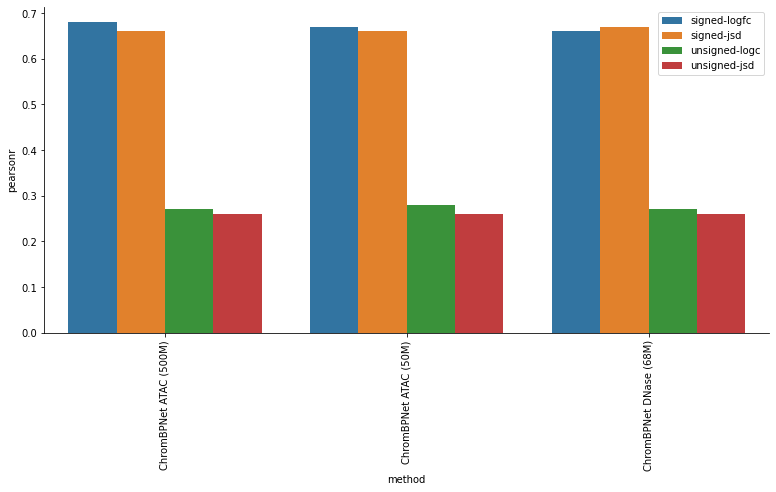

In [38]:
import seaborn as sns
import matplotlib
plt.figure(figsize=(13,6))

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42 
print(df["pearsonr"])
ax = sns.barplot(data=df, x="method", y="pearsonr", hue="scoring")
xtix = ["ChromBPNet ATAC (500M)", "ChromBPNet ATAC (50M)", "ChromBPNet DNase (68M)"]
ax.set_xticklabels(labels=xtix, rotation=90)
ax.spines[["top", "right"]].set_visible(False)
ax.legend(loc="upper right")
plt.savefig("subfigs/afr_caqtls_asb_pearsonr.pdf", transparent=True, dpi=300)

(0.6848214217530895, 0.0)


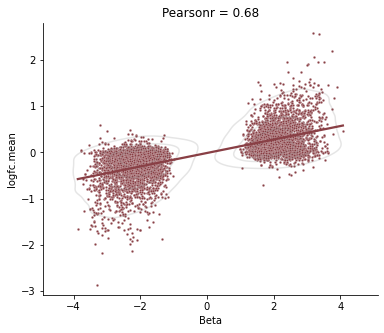

In [41]:

   
data = pd.DataFrame()
data["logfc.mean"] = asb_scores['GM12878.ENCSR637XSC.mean.logfc']
data["Beta"] = asb_scores["meanLog2FC"]

plt.figure(figsize=(6,5))

sns.kdeplot(
    data=data,
    x="Beta",
    y="logfc.mean",
    levels=5,
    fill=False,
    alpha=0.2,
    color="grey",
    cut=2,

)


ax = sns.scatterplot(x="Beta", y="logfc.mean", data=data, s=6, color="#893f45", rasterized=True)
sns.regplot(x="Beta", y="logfc.mean", data=data, scatter=False, ci=None, color="#893f45")
ax.spines[["top", "right"]].set_visible(False)

atc_pear = scipy.stats.pearsonr(data["logfc.mean"],data["Beta"])
print(atc_pear)
ax.set_title("Pearsonr = "+str(np.round(atc_pear[0],2)))


plt.savefig("subfigs/afr_caqtls_asb.pdf", transparent=True, dpi=300)